<a href="https://colab.research.google.com/github/mangeljm18/carroelectrico/blob/main/Carros_electricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
#Leer dataset
df_vehicle  = pd.read_csv('https://github.com/mangeljm18/carroelectrico/raw/refs/heads/main/Electric_Vehicle_Population_Data.csv.zip')
df_vehicle

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205434,1N4BZ1CV2N,Chelan,Peshastin,WA,98847.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,12.0,187384494,POINT (-120.6051696 47.5510173),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
205435,1FTVW1EV0P,Snohomish,Everett,WA,98208.0,2023,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,255036386,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10
205436,5YJXCDE22H,Spokane,Cheney,WA,99004.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,6.0,221631588,POINT (-117.5836098 47.4951312),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
205437,5YJ3E1EA3J,King,Vashon,WA,98070.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,34.0,336983496,POINT (-122.466938 47.429244),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [63]:
df_fabricante.drop(df_fabricante[(df_fabricante['Electric Range'] ==0)].index, inplace=True)
df_fabricante

,Make,Electric Range
0,JAGUAR,203.185185
1,WHEEGO ELECTRIC CARS,100.000000
2,TH!NK,100.000000
3,CHEVROLET,91.017798
4,FIAT,83.586984
5,NISSAN,76.032565
6,TESLA,68.234350
7,SMART,61.629032
8,AZURE DYNAMICS,56.000000
9,AUDI,46.913987


In [64]:
df_fabricante = df_fabricante.groupby('Make').agg({'Electric Range': 'mean'})
df_fabricante.reset_index()
df_fabricante = df_fabricante.sort_values('Electric Range', ascending=False)
df_fabricante = df_fabricante.reset_index()

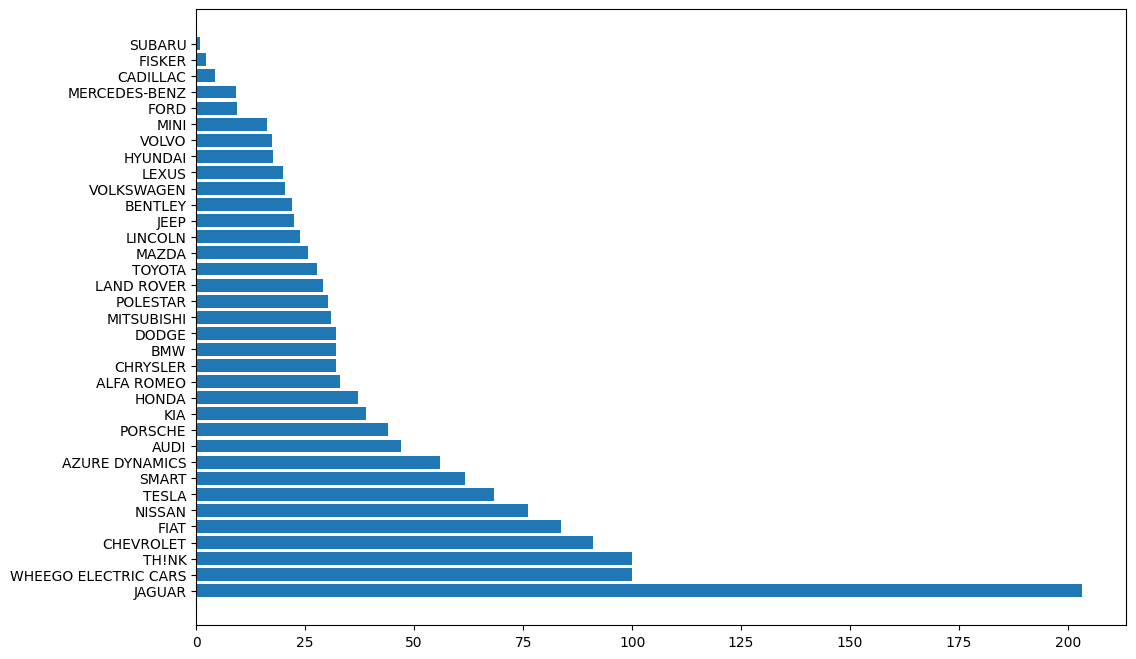

In [65]:
x = df_fabricante['Make']
y = df_fabricante['Electric Range']

plt.figure(figsize=(12,8))
plt.barh(x,y)
plt.show()

In [4]:
df_vehicle.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
df_vehicle.sample(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
96366,1FMCU0KZ5N,Cowlitz,Kalama,WA,98625.0,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,20.0,233674794,POINT (-122.8116866 45.9959901),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301500e+10
196585,5YJ3E1EA3P,Clark,Vancouver,WA,98682.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,17.0,244665655,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
32800,5YJYGDEF4M,Clark,Ridgefield,WA,98642.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,18.0,190061273,POINT (-122.6958231 45.804249),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
24910,5YJSA1E51N,Yakima,Yakima,WA,98908.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,14.0,196044152,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10
153599,1N4AZ1CP6K,Clark,Ridgefield,WA,98642.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,18.0,335580500,POINT (-122.6958231 45.804249),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10


In [6]:
df_vehicle.tail(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
205434,1N4BZ1CV2N,Chelan,Peshastin,WA,98847.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,12.0,187384494,POINT (-120.6051696 47.5510173),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
205435,1FTVW1EV0P,Snohomish,Everett,WA,98208.0,2023,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,255036386,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10
205436,5YJXCDE22H,Spokane,Cheney,WA,99004.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,6.0,221631588,POINT (-117.5836098 47.4951312),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
205437,5YJ3E1EA3J,King,Vashon,WA,98070.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,34.0,336983496,POINT (-122.466938 47.429244),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
205438,7SAYGDEE7P,Spokane,Spokane,WA,99208.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,6.0,228335040,POINT (-117.4268937 47.7323627),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10


In [7]:
df_vehicle.shape

(205439, 17)

In [8]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

In [9]:
df_vehicle.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,205436.000000,205439.000000,205431.000000,205431.000000,204997.000000,2.054390e+05,2.054360e+05
mean,98177.971870,2020.960363,52.164342,922.670532,28.970848,2.277156e+08,5.297704e+10
std,2419.037479,2.989059,88.075859,7761.753602,14.910052,7.205737e+07,1.588435e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.935324e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.382368e+08,5.303303e+10
75%,98372.000000,2023.000000,48.000000,0.000000,42.000000,2.618718e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [12]:
df_vehicle.describe(include='object')

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
count,205439,205436,205436,205439,205439,205438,205439,205439,205431,205436
unique,12140,205,770,45,42,152,2,3,928,74
top,7SAYGDEE6P,King,Seattle,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.1207376 47.6705374),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,1221,105237,33328,204997,90318,43437,161539,114172,5203,75156


In [11]:
df_vehicle.isnull().sum()

,0
VIN (1-10),0
County,3
City,3
State,0
Postal Code,3
Model Year,0
Make,0
Model,1
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [14]:
df_vehicle.dropna(inplace=True)
df_vehicle

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205434,1N4BZ1CV2N,Chelan,Peshastin,WA,98847.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,12.0,187384494,POINT (-120.6051696 47.5510173),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
205435,1FTVW1EV0P,Snohomish,Everett,WA,98208.0,2023,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,255036386,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10
205436,5YJXCDE22H,Spokane,Cheney,WA,99004.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,6.0,221631588,POINT (-117.5836098 47.4951312),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
205437,5YJ3E1EA3J,King,Vashon,WA,98070.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,34.0,336983496,POINT (-122.466938 47.429244),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [15]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204983 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         204983 non-null  object 
 1   County                                             204983 non-null  object 
 2   City                                               204983 non-null  object 
 3   State                                              204983 non-null  object 
 4   Postal Code                                        204983 non-null  float64
 5   Model Year                                         204983 non-null  int64  
 6   Make                                               204983 non-null  object 
 7   Model                                              204983 non-null  object 
 8   Electric Vehicle Type                              204983 non-null  object 
 9 

In [40]:
df_fabricante = df_vehicle.groupby('Make').agg({'Electric Range': 'mean'})
df_fabricante.reset_index()
df_fabricante = df_fabricante.sort_values('Electric Range', ascending=False)
df_fabricante = df_fabricante.reset_index()

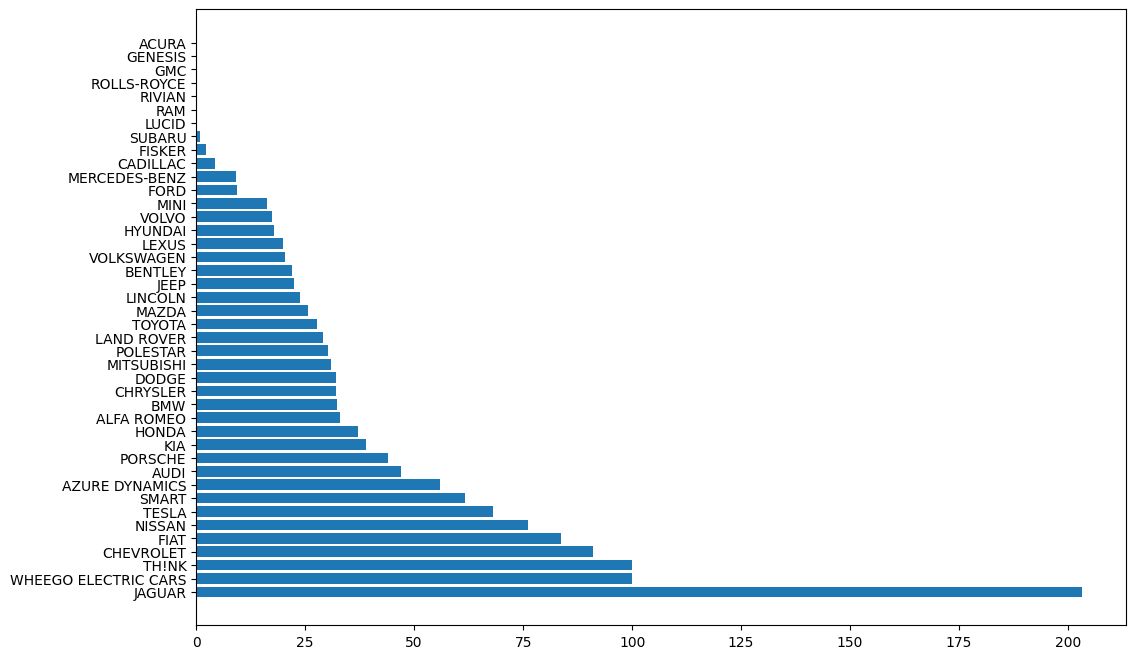

In [41]:
x = df_fabricante['Make']
y = df_fabricante['Electric Range']

plt.figure(figsize=(12,8))
plt.barh(x,y)
plt.show()

In [16]:
df_vehicle = df_vehicle[['Model Year', 'Make', 'Electric Vehicle Type', 'Electric Range', 'Base MSRP']]
df_vehicle

,Model Year,Make,Electric Vehicle Type,Electric Range,Base MSRP
0,2023,TOYOTA,Plug-in Hybrid Electric Vehicle (PHEV),42.0,0.0
1,2018,NISSAN,Battery Electric Vehicle (BEV),151.0,0.0
2,2020,TESLA,Battery Electric Vehicle (BEV),266.0,0.0
3,2014,NISSAN,Battery Electric Vehicle (BEV),84.0,0.0
4,2017,CHEVROLET,Battery Electric Vehicle (BEV),238.0,0.0
...,...,...,...,...,...
205434,2022,NISSAN,Battery Electric Vehicle (BEV),0.0,0.0
205435,2023,FORD,Battery Electric Vehicle (BEV),0.0,0.0
205436,2017,TESLA,Battery Electric Vehicle (BEV),200.0,0.0
205437,2018,TESLA,Battery Electric Vehicle (BEV),215.0,0.0


In [18]:
data = pd.get_dummies(df_vehicle, columns=['Make', 'Electric Vehicle Type'], drop_first=True)
data

,Model Year,Electric Range,Base MSRP,Make_ALFA ROMEO,Make_AUDI,Make_AZURE DYNAMICS,Make_BENTLEY,Make_BMW,Make_CADILLAC,Make_CHEVROLET,...,Make_ROLLS-ROYCE,Make_SMART,Make_SUBARU,Make_TESLA,Make_TH!NK,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Make_WHEEGO ELECTRIC CARS,Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)
0,2023,42.0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,2018,151.0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2020,266.0,0.0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,2014,84.0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2017,238.0,0.0,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205434,2022,0.0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205435,2023,0.0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205436,2017,200.0,0.0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
205437,2018,215.0,0.0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [21]:
data = data.dropna()
data

,Model Year,Electric Range,Base MSRP,Make_ALFA ROMEO,Make_AUDI,Make_AZURE DYNAMICS,Make_BENTLEY,Make_BMW,Make_CADILLAC,Make_CHEVROLET,...,Make_ROLLS-ROYCE,Make_SMART,Make_SUBARU,Make_TESLA,Make_TH!NK,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Make_WHEEGO ELECTRIC CARS,Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)
0,2023,42.0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,2018,151.0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2020,266.0,0.0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,2014,84.0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2017,238.0,0.0,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205434,2022,0.0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205435,2023,0.0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205436,2017,200.0,0.0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
205437,2018,215.0,0.0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
